# Predicting Mental Health in the Tech Industry with Supervised Machine Learning

43.8 million adults deal with mental health issues in a given year, and serious mental health conditions cost the US 193 billion dollars every year. 90% of suicide cases involve individuals that had an underlying mental health issue. The recent suicides of Kate Spade and Anthony Bourdain have brought mental health issues back into the spotlight, and help to show that mental health disease does not discriminate against its victims. These are just some statistics that highlight the seriousness of mental health, but there are many other equally alarming statistics that one can find with a simple google search. Being able to predict who may experience mental health issues will be important for business. Happy employees will perform much better than unhappy ones, and being able to alleviate the suffering of employees who may not feel comfortable sharing their health issues will help to alleviate the mental health epidemic. The survey I based my dataset on can be found at https://www.kaggle.com/osmi/mental-health-in-tech-survey#survey.csv. I decided to use survey answers (excluding those that explicity revealed if someone had a mental disorder) to try and predict whether someone had sought treatment for mental health.

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/spencerfogelman/Downloads/MentalHealth.csv')

In [3]:
pd.set_option('display.max_columns', 500)
sns.set_style('whitegrid')

# Data Cleaning and Exploration

In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/14 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/14 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/14 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/14 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/14 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df.shape

(1259, 27)

In [6]:
#Which features contain null values?
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
#Which country was the survey respondent born in?
df['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Sweden                      7
Switzerland                 7
Italy                       7
Poland                      7
Belgium                     6
South Africa                6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Mexico                      3
Finland                     3
Austria                     3
Colombia                    2
Croatia                     2
Portugal                    2
Denmark                     2
Greece                      2
Bahamas, The                1
Nigeria                     1
Spain                       1
Japan                       1
Thailand  

In [8]:
#Group Countries into regions for data analysis
df['GroupedCountry'] = 'United States'

df.loc[df['Country'].isin(['Bulgaria', 'Hungary', 'Czech Republic', 'Georgia', 'Bosnia and Herzegovina',
                             'Moldova', 'Romania', 'Latvia', 'Greece','Croatia', 
                          'Austria', 'Poland', 'Slovenia']), 'GroupedCountry'] = 'Eastern Europe'

df.loc[df['Country'].isin(['United Kingdom', 'Ireland', 'Spain', 'Portugal', 'France', 'Belgium',
                           'Netherlands', 'Switzerland','Italy', 'Germany', 'Denmark', 'Norway'
                           , 'Sweden','Finland']), 'GroupedCountry'] = 'Western Europe'

df.loc[df['Country'].isin(['Canada']), 'GroupedCountry'] = 'Canada'

df.loc[df['Country'].isin(['Australia', 'New Zealand']), 'GroupedCountry'] = 'Australia and New Zealand'

df.loc[df['Country'].isin(['Mexico', 'Brazil', 'Costa Rica', 'Bahamas, The',
                           'Uruguay', 'Colombia']), 'GroupedCountry'] ='Latin America'

df.loc[df['Country'].isin(['Japan', 'India', 'Singapore', 'Philippines',
                           'Thailand', 'China', 'Israel', 'Russia']), 'GroupedCountry'] = 'Asia'

df.loc[df['Country'].isin(['Zimbabwe', 'Nigeria', 'South Africa']), 'GroupedCountry'] = 'Africa'
print(df['GroupedCountry'].value_counts())

United States                751
Western Europe               333
Canada                        72
Australia and New Zealand     29
Eastern Europe                26
Asia                          26
Latin America                 14
Africa                         8
Name: GroupedCountry, dtype: int64


In [9]:
#Regroup countries that had too little values into an Other category. I considered anything less than 50 to be too little.
df.loc[df['GroupedCountry'].isin(['Australia and New Zealand', 'Eastern Europe', 'Asia', 'Latin America', 'Africa']),
                                  'GroupedCountry'] = 'Other'

In [10]:
print(df['GroupedCountry'].value_counts())

United States     751
Western Europe    333
Other             103
Canada             72
Name: GroupedCountry, dtype: int64


In [11]:
#Process Timestamp data
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].apply(lambda x: x.month)

df['Year'] = df['Timestamp'].apply(lambda x: x.year)

df['Hour'] = df['Timestamp'].apply(lambda x: x.hour)

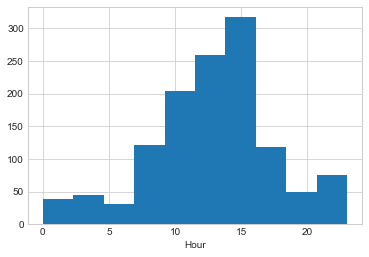

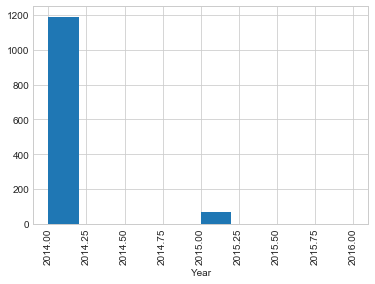

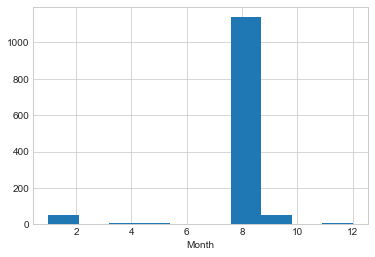

In [12]:
#Visualize Timestamp data, which was when the survey was taken.
df['Hour'].hist()
plt.xlabel('Hour')
plt.show()

df['Year'].hist()
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.show()

df['Month'].hist()
plt.xlabel('Month')
plt.show()

In [13]:
#Process the age data 
df['Age'].value_counts(dropna=False).sort_index()

-1726            1
-29              1
-1               1
 5               1
 8               1
 11              1
 18              7
 19              9
 20              6
 21             16
 22             21
 23             51
 24             46
 25             61
 26             75
 27             71
 28             68
 29             85
 30             63
 31             67
 32             82
 33             70
 34             65
 35             55
 36             37
 37             43
 38             39
 39             33
 40             33
 41             21
 42             20
 43             28
 44             11
 45             12
 46             12
 47              2
 48              6
 49              4
 50              6
 51              5
 53              1
 54              3
 55              3
 56              4
 57              3
 58              1
 60              2
 61              1
 62              1
 65              1
 72              1
 329             1
 99999999999

In [14]:
#Convert strange age values to nan
df.loc[(df['Age'] > 72) | (df['Age'] < 18), 'Age'] = np.nan

In [15]:
df['Age'].value_counts(dropna=False).sort_index()

 18.0     7
 19.0     9
 20.0     6
 21.0    16
 22.0    21
 23.0    51
 24.0    46
 25.0    61
 26.0    75
 27.0    71
 28.0    68
 29.0    85
 30.0    63
 31.0    67
 32.0    82
 33.0    70
 34.0    65
 35.0    55
 36.0    37
 37.0    43
 38.0    39
 39.0    33
 40.0    33
 41.0    21
 42.0    20
 43.0    28
 44.0    11
 45.0    12
 46.0    12
 47.0     2
 48.0     6
 49.0     4
 50.0     6
 51.0     5
 53.0     1
 54.0     3
 55.0     3
 56.0     4
 57.0     3
 58.0     1
 60.0     2
 61.0     1
 62.0     1
 65.0     1
 72.0     1
NaN       8
Name: Age, dtype: int64

In [16]:
#Replace strange values with random samples from the survey
samples = df['Age'].sample(n=8, replace=True, random_state=0).values

df.loc[df['Age'].isna(), 'Age'] = samples

df['Age'].isna().sum()

0

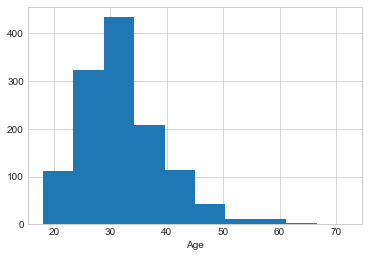

In [17]:
#Explore cleaned up age variable
df['Age'].hist()
plt.xlabel('Age')
plt.show()

In [18]:
#If in the US, this was the state the respondent was born in. Anyone not in the US would have a nan value.
df['state'].value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
PA     29
IL     29
OR     29
IN     27
MI     22
MN     21
MA     20
FL     15
VA     14
NC     14
WI     12
GA     12
MO     12
UT     11
CO      9
AL      8
MD      8
AZ      7
NJ      6
OK      6
KY      5
SC      5
DC      4
IA      4
CT      4
SD      3
NV      3
VT      3
NH      3
KS      3
WY      2
NM      2
NE      2
RI      1
LA      1
MS      1
ME      1
WV      1
ID      1
Name: state, dtype: int64

In [19]:
#Group into areas of the US 
df['USGroup'] = 'Not in US'

df.loc[df['state'] == 'CA', 'USGroup'] = 'California'

df.loc[df['state'] == 'NY', 'USGroup'] = 'NewYork'

df.loc[df['state'].isin(['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO',
                         'WI', 'IL', 'IN', 'MI', 'OH']), 'USGroup'] = 'Midwest'

df.loc[df['state'].isin(['ME', 'NH', 'MA', 'CT', 'VT',
                         'PA', 'NJ', 'RI']), 'USGroup'] = 'East'

df.loc[df['state'].isin(['TX', 'OK', 'AR', 'LA', 'MS',
                         'AL', 'TN', 'KY', 'WV', 'VA',
                         'DC', 'MD', 'DE', 'NC', 'SC', 'GA', 'FL']), 'USGroup'] = 'South'

In [20]:
df['USGroup'].value_counts()

Not in US     649
South         183
Midwest       165
California    138
East           67
NewYork        57
Name: USGroup, dtype: int64

In [21]:
#Strip extra white space around the gender responses
df['Gender'] = df['Gender'].apply(lambda x: x.strip())

In [22]:
df['Gender'].value_counts()

Male                                              618
male                                              206
Female                                            123
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Man                                                 2
Female (trans)                                      2
Cis Male                                            2
p                                                   1
Femake                                              1
Mail                                                1
Agender                                             1
queer                                               1
Cis Man                     

In [27]:
#Clean up the gender responses
df.loc[df['Gender'].isin(['Male', 'male', 'M', 'm', 'Make', 'Man', 'Cis Male', 'Malr'
                        ,'Male (CIS)', 'Mail', 'ostensibly male, unsure what that really means'
                        , 'male leaning androgynous', 'something kinda male?',
                        'Mal', 'Guy (-ish) ^_^', 'maile', 'Male-ish',
                         'cis male', 'msle', 'Cis Man']), 'Gender'] = 'Male'

df.loc[df['Gender'].isin(['Female', 'female', 'F', 'Woman', 'f', 'femail',
                         'Female (cis)', 'Cis Female', 'cis-female/femme',
                         'Femake', 'woman']), 'Gender'] = 'Female'

df.loc[df['Gender'].isin(['Female (trans)', 'Trans-female', 'Trans woman']), 'Gender'] = 'Trans Female'

df.loc[df['Gender'].isin(['queer/she/they', 'All', 'Agender', 'Neuter', 'non-binary', 'queer',
                         'fluid', 'Genderqueer', 'Androgyne']), 'Gender'] = 'Queer'

df.loc[df['Gender'].isin(['p', 'A little about you', 'Nah', 'Enby']), 'Gender'] = 'Undisclosed'

In [28]:
df['Gender'].value_counts()

Male            995
Female          247
Queer             9
Undisclosed       4
Trans Female      4
Name: Gender, dtype: int64

In [29]:
#Group categories that contained too little values into an other category
df.loc[df['Gender'].isin(['Queer', 'Trans Female', 'Undisclosed']), 'Gender'] = 'Other'

In [30]:
df['Gender'].value_counts()

Male      995
Female    247
Other      17
Name: Gender, dtype: int64

In [31]:
#Is the respondent self employed?
df['self_employed'].value_counts(dropna=False)

No     1095
Yes     146
NaN      18
Name: self_employed, dtype: int64

In [32]:
#Does the respondent have a family history of mental illness?
df['family_history'].value_counts(dropna=False)

No     767
Yes    492
Name: family_history, dtype: int64

In [33]:
#Has the respondent sought treatment for mental illness (the feature I am trying to predict)
df['treatment'].value_counts(dropna=False)

Yes    637
No     622
Name: treatment, dtype: int64

In [34]:
#If the respondent has a mental illness, has it interfered with his work? I decided to exclude this variable.
df['work_interfere'].value_counts(dropna=False)

Sometimes    465
NaN          264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [35]:
#How big is the company of the respondant? There was some strange encoding errors that I cleaned up.
print(df['no_employees'].value_counts(dropna=False))

df.loc[df['no_employees'] == '25-Jun', 'no_employees'] = '6-25'

df.loc[df['no_employees'] == '5-Jan', 'no_employees'] = '1-5'
print()
print(df['no_employees'].value_counts())

25-Jun            290
26-100            289
More than 1000    282
100-500           176
5-Jan             162
500-1000           60
Name: no_employees, dtype: int64

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64


In [36]:
#Does the respondent primarily work remotely?
df['remote_work'].value_counts(dropna=False)

No     883
Yes    376
Name: remote_work, dtype: int64

In [37]:
#Is the respondent's company primarily invovled in tech?
df['tech_company'].value_counts(dropna=False)

Yes    1031
No      228
Name: tech_company, dtype: int64

In [38]:
#Does your employer provide mental health benefits?
df['benefits'].value_counts(dropna=False)

Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64

In [39]:
#Do you know the care options for mental health your employer provides?
df['care_options'].value_counts(dropna=False)

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

In [40]:
#Has your employer ever discussed mental health as part of an employee wellness program?
df['wellness_program'].value_counts(dropna=False)

No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64

In [41]:
#Does your employer provide resources to learn more about mental health issues and how to seek help?
df['seek_help'].value_counts(dropna=False)

No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64

In [42]:
#Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
df['anonymity'].value_counts(dropna=False)

Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64

In [43]:
#How easy is it for you to take medical leave for a mental health condition?
df['leave'].value_counts(dropna=False)

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

In [44]:
#Do you think that discussing a mental health issue with your employer would have negative consequences?
df['mental_health_consequence'].value_counts(dropna=False)

No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64

In [45]:
#Do you think that discussing a physical health issue with your employer would have negative consequences?
df['phys_health_consequence'].value_counts(dropna=False)

No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

In [46]:
#Would you be willing to discuss a mental health issue with your coworkers?
df['coworkers'].value_counts(dropna=False)

Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64

In [47]:
#Would you be willing to discuss a mental health issue with your direct supervisor(s)?
df['supervisor'].value_counts(dropna=False)

Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

In [48]:
#Would you bring up a mental health issue with a potential employer in an interview?
df['mental_health_interview'].value_counts(dropna=False)

No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64

In [49]:
#Would you bring up a physical health issue with a potential employer in an interview?
df['phys_health_interview'].value_counts(dropna=False)

Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64

In [50]:
#Do you feel that your employer takes mental health as seriously as physical health?
df['mental_vs_physical'].value_counts(dropna=False)

Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64

In [51]:
#Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
df['obs_consequence'].value_counts(dropna=False)

No     1075
Yes     184
Name: obs_consequence, dtype: int64

# Feature Engineering

In [52]:
#Create a feature where the number of times the person did not answer is counted. However, 
# we have to subtract one when the person is not from the US because they will always have 
# a null value for the State column
def NumNull(x):
    nulls = x.isnull().sum()
    if x['Country'] != 'United States':
        nulls = nulls -1
    return nulls

df['NumberOfNulls'] = df.apply(NumNull, axis=1)

In [53]:
#Create a column where we count the number of times each person answered no.
def CountNo(x):
    count_no = 0
    for i in x.values:
        if i == 'No':
            count_no+=1
    return count_no

df['NumberofNo'] = df.apply(CountNo, axis=1)

In [54]:
#Create a column where we count the number of times each person answered yes.
def CountYes(x):
    count_yes = 0
    for i in x.values:
        if i == 'Yes':
            count_yes+=1
    return count_yes

df['NumberofYes'] = df.apply(CountYes, axis=1)

In [55]:
#Create a column where all the person's answers that signfiy they are uncertain about the 
# companies policies on mental health or how the company will respond to mental health
#issues is summed.
def FindUncertainty(x):
    return x.isin(["Don't know", 'Maybe']).sum()

df['UncertainResponse'] = df.apply(FindUncertainty, axis=1)

In [56]:
#Create a column that indicates whether there the person left a comment. There was an option to do this but most people
#did not.
df['CommentPresent'] = np.where(df['comments'].isna(), 0, 1)

In [57]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,GroupedCountry,Month,Year,Hour,USGroup,NumberOfNulls,NumberofNo,NumberofYes,UncertainResponse,CommentPresent
0,2014-08-27 11:29:00,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,United States,8,2014,11,Midwest,2,7,7,1,0
1,2014-08-27 11:29:00,44.0,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,United States,8,2014,11,Midwest,2,11,0,7,0
2,2014-08-27 11:29:00,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,Canada,8,2014,11,Not in US,2,11,5,1,0
3,2014-08-27 11:29:00,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,Western Europe,8,2014,11,Not in US,2,7,7,2,0
4,2014-08-27 11:30:00,31.0,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,United States,8,2014,11,South,2,6,6,5,0


# Data Visualization

[ 0.49724516  0.45226702  0.50636968  0.50163133  0.48038446  0.51234754
  0.45773771  0.51639778  0.50400693  0.50215585  0.49256771  0.50174521
  0.49718577  0.50211673  0.49984195  0.49163656  0.50279656  0.50127519
  0.44977645  0.50071174  0.50964719  0.50395263  0.49013252  0.50729966]


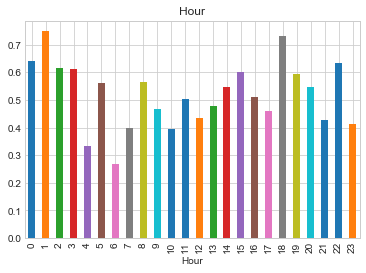

In [121]:
#Does time of survey influence mental health responses?
dct = {'Yes': 1, 'No': 0}
df['treatment_bool'] = df['treatment'].map(dct)
std = df.groupby('Hour')['treatment_bool'].std().values
print(std)
df.groupby('Hour')['treatment_bool'].mean().sort_index().plot(kind='bar')
plt.title('Hour')
plt.show()
#There does not seem to be any trend.

[ 0.50331452  0.49382249  0.49821697  0.49765178]


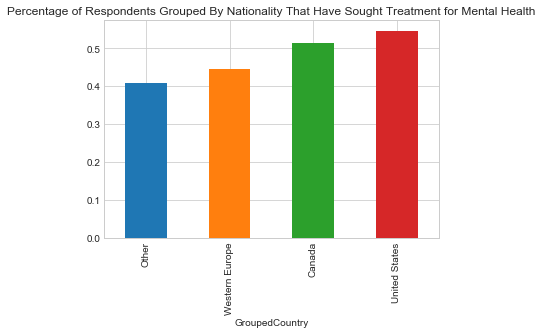

In [142]:
#How does country influence whether someone will seek treatment for mental health?
dev = df.groupby('GroupedCountry')['treatment_bool'].std().values
print(dev)
df.groupby('GroupedCountry')['treatment_bool'].mean().sort_values().plot(kind='bar')
plt.title('Percentage of Respondents Grouped By Nationality That Have Sought Treatment for Mental Health')
plt.show()
#There seems to be a difference by Region.

In [ ]:
#This function will take bootstrap samples of size twenty 100 times. It will then compare the mean treatment percentage 
#between two groups using a ttest. I did not know of a better statistical way to do this because my data were composed of
#0s and 1s.
def bootstrap_ttest(col, var1, var2):
    list1=[]
    list2=[]
    for i in range(100):
        group1 = df[df[col] == var1]['treatment_bool'].sample(20, replace=True).mean()
        list1.append(group1)
        group2 = df[df[col] == var2]['treatment_bool'].sample(20, replace=True).mean()
        list2.append(group2)
    return ttest_ind(list1, list2)

In [150]:
print('Other vs Western Europe:', bootstrap_ttest('GroupedCountry', 'Other', 'Western Europe'))
print('Western Europe vs Canada:', bootstrap_ttest('GroupedCountry', 'Western Europe', 'Canada'))
print('Canada vs United States:', bootstrap_ttest('GroupedCountry', 'Canada', 'United States'))
#There seems to be a significant difference in mental health between the areas.

Other vs Western Europe: Ttest_indResult(statistic=-2.772443626473192, pvalue=0.0060948552784397293)
Western Europe vs Canada: Ttest_indResult(statistic=-3.7534203955223466, pvalue=0.00022916811150438455)
Canada vs United States: Ttest_indResult(statistic=-3.6187838058295831, pvalue=0.00037578393571161375)


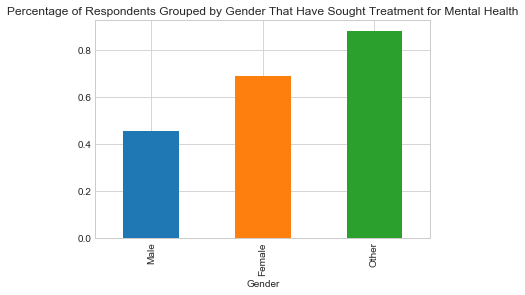

In [60]:
#How does gender influence mental health?
df.groupby('Gender')['treatment_bool'].mean().sort_values().plot(kind='bar')
plt.title('Percentage of Respondents Grouped by Gender That Have Sought Treatment for Mental Health')
plt.show()

In [151]:
print('Male vs Female:', bootstrap_ttest('Gender', 'Male', 'Female'))
print('Female vs Other:', bootstrap_ttest('Gender', 'Female', 'Other'))
#There seems to be a significant difference in mental health between genders.

Male vs Female: Ttest_indResult(statistic=-15.880139965195417, pvalue=3.647029234041832e-37)
Female vs Other: Ttest_indResult(statistic=-14.428686544318657, pvalue=1.0049216453835953e-32)


[ 18.  26.  29.  33.  38.  72.]


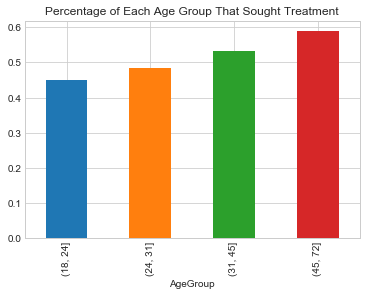

In [152]:
#How does age influence seeking treatment?
#What is a good split on age based on quantiles?
_, bins = pd.qcut(df['Age'], 5, retbins=True)
print(bins)
#I decided instead to split on stages on life.
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,24,31,45,72])

df.groupby('AgeGroup')['treatment_bool'].mean().sort_index().plot(kind='bar')
plt.title('Percentage of Each Age Group That Sought Treatment')
plt.show()
#There seems to be a worsening in mental health based on age.

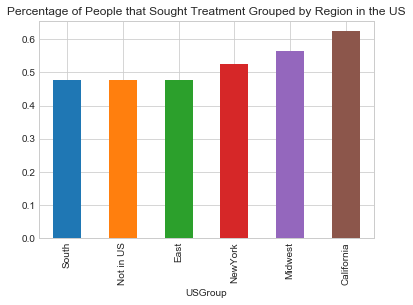

In [62]:
#How does state influence mental health?
df.groupby('USGroup')['treatment_bool'].mean().sort_values().plot(kind='bar')
plt.title('Percentage of People that Sought Treatment Grouped by Region in the US')
plt.show()

In [157]:
print('South vs East:', bootstrap_ttest('USGroup', 'South', 'East'))
print('East vs New York:', bootstrap_ttest('USGroup', 'East', 'NewYork'))
print('New York vs Midwest:', bootstrap_ttest('USGroup', 'NewYork', 'Midwest'))
print('Midwest vs California:', bootstrap_ttest('USGroup', 'Midwest', 'California'))
#Some of the differences are significant while others are not.

South vs East: Ttest_indResult(statistic=0.48150241606057459, pvalue=0.63069119105791838)
East vs New York: Ttest_indResult(statistic=-2.5382035961836573, pvalue=0.011911878592929947)
New York vs Midwest: Ttest_indResult(statistic=-3.1202022410442822, pvalue=0.0020772340868840545)
Midwest vs California: Ttest_indResult(statistic=-1.8497077526311858, pvalue=0.065846041493690055)


# Predicting Mental Health With Supervised Learning

In [116]:
#Use a random forest with a few features of interest and One Hot Encoding to try and predict whether someone has
#sought treatment for mental health.
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X= df[['Age', 'Gender', 'GroupedCountry', 'USGroup', 'NumberOfNulls',
       'UncertainResponse', 'CommentPresent', 'self_employed', 'family_history', 
      'no_employees', 'remote_work', 'tech_company', 'NumberofNo', 'NumberofYes']]
X = pd.get_dummies(X, drop_first=True)
y = df['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [117]:
#Print the train and test scores. We see that the score for our test sample was a little low and that there is some 
#overfitting.
print('Train', clf.score(X_train, y_train))
print('Test', clf.score(X_test, y_test))

Train 0.989784335982
Test 0.740740740741


In [118]:
#Look at which features were most important in trying to make predictions.
importance = clf.feature_importances_
features = pd.DataFrame()
features['importance'] = importance
features['names'] = X.columns
features.sort_values(by='importance', ascending=False)

,importance,names
5,0.172842,NumberofYes
1,0.153181,NumberOfNulls
4,0.125013,NumberofNo
0,0.110948,Age
2,0.083592,UncertainResponse
17,0.077221,family_history_Yes
24,0.033454,tech_company_Yes
6,0.028213,Gender_Male
23,0.020962,remote_work_Yes
14,0.018463,USGroup_Not in US


In [66]:
from sklearn.model_selection import RandomizedSearchCV
import math

In [102]:
#Convert categorical variables into numbers instead of using One Hot Encoding, to try to see if performance 
#increases. Also add more variables to try to increase performance.
for var in ['Gender', 'GroupedCountry', 'USGroup', 'self_employed', 'family_history', 
      'no_employees', 'remote_work', 'tech_company', 'obs_consequence','mental_vs_physical','mental_health_interview',
           'phys_health_interview', 'supervisor', 'coworkers', 'phys_health_consequence', 'mental_health_consequence',
           'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence']:
    lst = [(value, index) for index, value in enumerate(df[var].unique())]
    d = dict(lst)
    df[var + 'New'] = df[var].map(d)
       

In [103]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,GroupedCountry,Month,Year,Hour,USGroup,NumberOfNulls,NumberofNo,NumberofYes,UncertainResponse,CommentPresent,treatment_bool,AgeGroup,GenderNew,GroupedCountryNew,USGroupNew,NumberOfNullsNew,UncertainResponseNew,self_employedNew,family_historyNew,no_employeesNew,remote_workNew,tech_companyNew,obs_consequenceNew,mental_vs_physicalNew,mental_health_interviewNew,phys_health_interviewNew,supervisorNew,coworkersNew,phys_health_consequenceNew,mental_health_consequenceNew,benefitsNew,care_optionsNew,wellness_programNew,seek_helpNew,anonymityNew,leaveNew
0,2014-08-27 11:29:00,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,United States,8,2014,11,Midwest,2,7,7,1,0,1,"(35, 40]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014-08-27 11:29:00,44.0,Male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN,United States,8,2014,11,Midwest,2,11,0,7,0,0,"(40, 45]",1,0,0,0,1,0,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1
2,2014-08-27 11:29:00,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN,Canada,8,2014,11,Not in US,2,11,5,1,0,0,"(30, 35]",1,1,1,0,0,0,0,0,0,0,0,2,1,2,0,2,0,0,2,1,0,2,1,2
3,2014-08-27 11:29:00,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,Western Europe,8,2014,11,Not in US,2,7,7,2,0,1,"(30, 35]",1,2,1,0,2,0,1,2,0,0,1,2,2,0,1,0,1,2,2,2,0,2,2,2
4,2014-08-27 11:30:00,31.0,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,United States,8,2014,11,South,2,6,6,5,0,0,"(30, 35]",1,0,2,0,3,0,0,3,1,0,0,1,1,2,0,0,0,0,0,1,1,1,1,1


In [107]:
#Refit and score using RandomForest.
X = df[['Age', 'CommentPresent', 'NumberOfNulls', 'NumberofNo','NumberofYes', 'UncertainResponse',
       'GenderNew', 'GroupedCountryNew', 'USGroupNew',
       'NumberOfNullsNew', 'UncertainResponseNew', 'self_employedNew',
       'family_historyNew', 'no_employeesNew', 'remote_workNew',
       'tech_companyNew', 'obs_consequenceNew', 'mental_vs_physicalNew', 'mental_health_interviewNew',
       'phys_health_interviewNew', 'supervisorNew', 'coworkersNew', 'phys_health_consequenceNew',
       'mental_health_consequenceNew', 'benefitsNew', 'care_optionsNew',
       'wellness_programNew', 'seek_helpNew', 'anonymityNew', 'leaveNew']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [108]:
#We see that the score went up slightlty but there is still overfitting.
print('Train', clf.score(X_train, y_train))
print('Test', clf.score(X_test, y_test))

Train 0.981838819523
Test 0.772486772487


In [109]:
#Look at the feature importance in making our predictions.
importance = clf.feature_importances_
features = pd.DataFrame()
features['importance'] = importance
features['names'] = X.columns
features.sort_values(by='importance', ascending=False)

,importance,names
4,0.150031,NumberofYes
9,0.095999,NumberOfNullsNew
12,0.086435,family_historyNew
2,0.072513,NumberOfNulls
3,0.068003,NumberofNo
0,0.062390,Age
13,0.036786,no_employeesNew
10,0.032701,UncertainResponseNew
5,0.029331,UncertainResponse
25,0.028093,care_optionsNew


In [112]:
from sklearn.model_selection import RandomizedSearchCV
import math

#Create random lists of parameters to try and tune our random forest for better performance instead of using the 
#defaults
n_estimators = [math.floor(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [math.floor(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(estimator = clf, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=1, random_state=42)

clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  9.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'min_samples_leaf': [1, 2, 4], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'bootstrap': [True, False], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [113]:
#Grab the best parameters that were found using hyperparameter tuning and refit with random forest. We see our score 
#improved a little but there is still overfitting.
params = clf_random.best_params_
clf = RandomForestClassifier(**params)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.988649262202
0.793650793651


In [114]:
#Look at the feature importance of our new model.
importance = clf.feature_importances_
features = pd.DataFrame()
features['importance'] = importance
features['names'] = X.columns
features.sort_values(by='importance', ascending=False)

,importance,names
4,0.144037,NumberofYes
2,0.130335,NumberOfNulls
9,0.111724,NumberOfNullsNew
3,0.091430,NumberofNo
12,0.078601,family_historyNew
0,0.046286,Age
25,0.029399,care_optionsNew
5,0.026599,UncertainResponse
13,0.022825,no_employeesNew
10,0.021481,UncertainResponseNew


In [137]:
#Try different models
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.804767309875
0.785714285714
0.872871736663
0.769841269841


# Conclusion

We see that our model got up to 80 percent accuracy in predicting whether or not someone had mental health issues. Because this survey was not meant to used for this type of prediciton, there are many questions that were left out that could have provided more information. Also, there were only 1259 respondents, which is not a huge amount of observations to work with for a supervised machine lerning problem. Mental health is very difficult to try and predict because of how undiscriminating it is, so I am not surprised I could not get my model up to 90 percent. However, I believe that 80 percent is still a good start and if the survey was given to more people and more information was provided, such as education, ethnicity, hours of sleep per night, etc., the predictive power could have been greater.